# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
       
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#time.sleep(1) - to protect comp shut down - pauses
for i, j in enumerate(cities):
     
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + j.replace(" ","+")
    
# Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, {j}))
    
    
# Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_name = city_weather["name"]
        city_description = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]
        
# Append the City information into city_data list
        city_data.append({"City": city_name,       
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed":  city_wind,
                          "Current Description": city_description,
                          "Country": city_country})
     

# If an error is experienced, skip the city
    except:
        #print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | {'prince rupert'}
Processing Record 2 of Set 1 | {'rongelap'}
Processing Record 3 of Set 1 | {'margaret river'}
Processing Record 4 of Set 1 | {'susuman'}
Processing Record 5 of Set 1 | {'alotau'}
Processing Record 6 of Set 1 | {'saipan'}
Processing Record 7 of Set 1 | {"novolukoml'"}
Processing Record 8 of Set 1 | {'praia da vitoria'}
Processing Record 9 of Set 1 | {'taiohae'}
Processing Record 10 of Set 1 | {'huaraz'}
Processing Record 11 of Set 1 | {'grytviken'}
Processing Record 12 of Set 1 | {'iqaluit'}
Processing Record 13 of Set 1 | {'puerto san carlos'}
Processing Record 14 of Set 1 | {'college'}
Processing Record 15 of Set 1 | {'acarau'}
Processing Record 16 of Set 1 | {'ometepec'}
Processing Record 17 of Set 1 | {'isafjordur'}
Processing Record 18 of Set 1 | {'waitangi'}
Processing Record 19 of Set 1 | {'talnakh'}
Processing Record 20 of Set 1 | {"st. john's"}
Processing Record 21 of Se

Processing Record 29 of Set 4 | {'nemuro'}
Processing Record 30 of Set 4 | {'medina'}
Processing Record 31 of Set 4 | {'savran'}
Processing Record 32 of Set 4 | {'oebisfelde'}
Processing Record 33 of Set 4 | {'barra'}
Processing Record 34 of Set 4 | {'penticton'}
Processing Record 35 of Set 4 | {'vingt cinq'}
Processing Record 36 of Set 4 | {'afaahiti'}
Processing Record 37 of Set 4 | {'lospalos'}
Processing Record 38 of Set 4 | {'al bayda'}
Processing Record 39 of Set 4 | {'labasa'}
Processing Record 40 of Set 4 | {'villa gesell'}
Processing Record 41 of Set 4 | {'santa cruz'}
Processing Record 42 of Set 4 | {'christchurch'}
Processing Record 43 of Set 4 | {'humaita'}
Processing Record 44 of Set 4 | {'poronaysk'}
Processing Record 45 of Set 4 | {'yarmouth'}
Processing Record 46 of Set 4 | {'evansville'}
Processing Record 47 of Set 4 | {'la rinconada'}
Processing Record 48 of Set 4 | {'luderitz'}
Processing Record 49 of Set 4 | {'brokopondo'}
Processing Record 50 of Set 4 | {'touros'}


Processing Record 10 of Set 8 | {'smirnykh'}
Processing Record 11 of Set 8 | {'williams lake'}
Processing Record 12 of Set 8 | {'reggane'}
Processing Record 13 of Set 8 | {'antonio enes'}
Processing Record 14 of Set 8 | {'puerto madryn'}
Processing Record 15 of Set 8 | {'saint-louis'}
Processing Record 16 of Set 8 | {'sandnessjoen'}
Processing Record 17 of Set 8 | {'howrah'}
Processing Record 18 of Set 8 | {'newman'}
Processing Record 19 of Set 8 | {'senador pompeu'}
Processing Record 20 of Set 8 | {'meulaboh'}
Processing Record 21 of Set 8 | {'yabelo'}
Processing Record 22 of Set 8 | {'trinidad'}
Processing Record 23 of Set 8 | {'constantia'}
Processing Record 24 of Set 8 | {'the pas'}
Processing Record 25 of Set 8 | {'trinity beach'}
Processing Record 26 of Set 8 | {'saint-philippe'}
Processing Record 27 of Set 8 | {'new norfolk'}
Processing Record 28 of Set 8 | {'atmore'}
Processing Record 29 of Set 8 | {'yamada'}
Processing Record 30 of Set 8 | {'hammond'}
Processing Record 31 of S

Processing Record 37 of Set 11 | {'tsiombe'}
Processing Record 38 of Set 11 | {'ciudad melchor muzquiz'}
Processing Record 39 of Set 11 | {'toccoa'}
Processing Record 40 of Set 11 | {'vylkove'}
Processing Record 41 of Set 11 | {'san julian'}
Processing Record 42 of Set 11 | {'remire-montjoly'}
Processing Record 43 of Set 11 | {'shimoda'}
Processing Record 44 of Set 11 | {'karratha'}
Processing Record 45 of Set 11 | {'koulamoutou'}
Processing Record 46 of Set 11 | {'pariaman'}
Processing Record 47 of Set 11 | {'cassilandia'}
Processing Record 48 of Set 11 | {'caninde'}
Processing Record 49 of Set 11 | {'hobyo'}
Processing Record 50 of Set 11 | {'selfoss'}
Processing Record 1 of Set 12 | {'las tablas'}
Processing Record 2 of Set 12 | {'puerto aysen'}
Processing Record 3 of Set 12 | {'fray luis a. beltran'}
Processing Record 4 of Set 12 | {'guangming'}
Processing Record 5 of Set 12 | {'aiquile'}
Processing Record 6 of Set 12 | {'alaghsas'}
Processing Record 7 of Set 12 | {'kruisfontein'}


In [6]:
# # Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Current Description"]
# # Show Record Count
city_data_df = city_data_df[new_column_order] 
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Prince Rupert,CA,54.3161,-130.3201,44.29,71,100,29.93,light rain
1,Rongelap,MH,11.1635,166.8941,81.68,78,100,20.76,light rain
2,Margaret River,AU,-33.9500,115.0667,57.07,57,0,14.90,clear sky
3,Susuman,RU,62.7833,148.1667,1.98,97,100,1.99,overcast clouds
4,Saipan,MP,15.1355,145.7010,81.30,83,40,13.80,scattered clouds


In [7]:
# Display sample data
city_data

[{'City': 'Prince Rupert',
  'Lat': 54.3161,
  'Lng': -130.3201,
  'Max Temp': 44.29,
  'Humidity': 71,
  'Cloudiness': 100,
  'Wind Speed': 29.93,
  'Current Description': 'light rain',
  'Country': 'CA'},
 {'City': 'Rongelap',
  'Lat': 11.1635,
  'Lng': 166.8941,
  'Max Temp': 81.68,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 20.76,
  'Current Description': 'light rain',
  'Country': 'MH'},
 {'City': 'Margaret River',
  'Lat': -33.95,
  'Lng': 115.0667,
  'Max Temp': 57.07,
  'Humidity': 57,
  'Cloudiness': 0,
  'Wind Speed': 14.9,
  'Current Description': 'clear sky',
  'Country': 'AU'},
 {'City': 'Susuman',
  'Lat': 62.7833,
  'Lng': 148.1667,
  'Max Temp': 1.98,
  'Humidity': 97,
  'Cloudiness': 100,
  'Wind Speed': 1.99,
  'Current Description': 'overcast clouds',
  'Country': 'RU'},
 {'City': 'Saipan',
  'Lat': 15.1355,
  'Lng': 145.701,
  'Max Temp': 81.3,
  'Humidity': 83,
  'Cloudiness': 40,
  'Wind Speed': 13.8,
  'Current Description': 'scattered clouds',
  'Cou

In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
City_ID,,,,,,,,,
0,Prince Rupert,CA,54.3161,-130.3201,44.29,71,100,29.93,light rain
1,Rongelap,MH,11.1635,166.8941,81.68,78,100,20.76,light rain
2,Margaret River,AU,-33.9500,115.0667,57.07,57,0,14.90,clear sky
3,Susuman,RU,62.7833,148.1667,1.98,97,100,1.99,overcast clouds
4,Saipan,MP,15.1355,145.7010,81.30,83,40,13.80,scattered clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

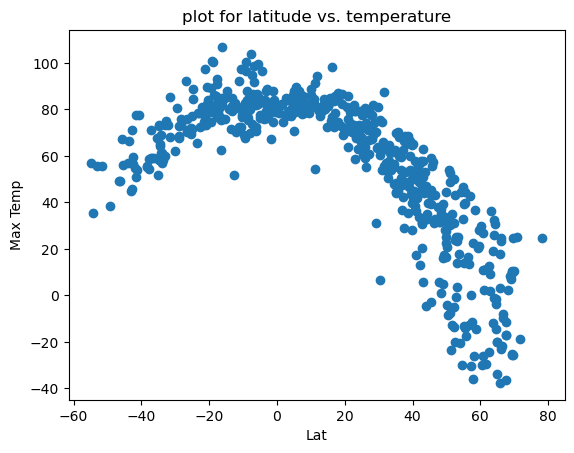

In [50]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('plot for latitude vs. temperature')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

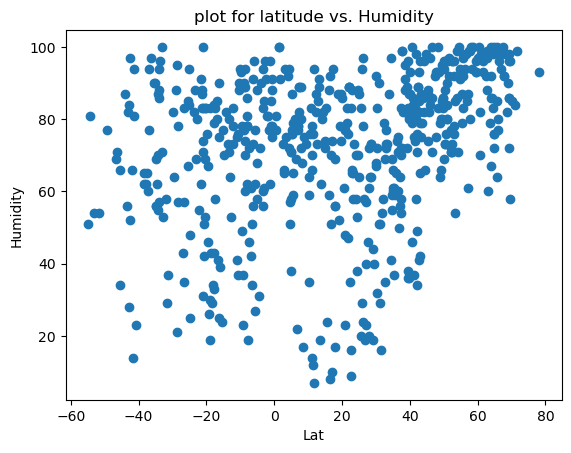

<Figure size 640x480 with 0 Axes>

In [38]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('plot for latitude vs. Humidity')
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

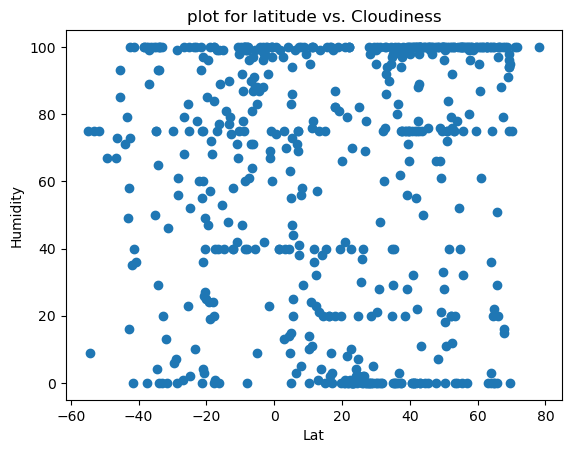

<Figure size 640x480 with 0 Axes>

In [40]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y)
plt.xlabel("Lat")


# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('plot for latitude vs. Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

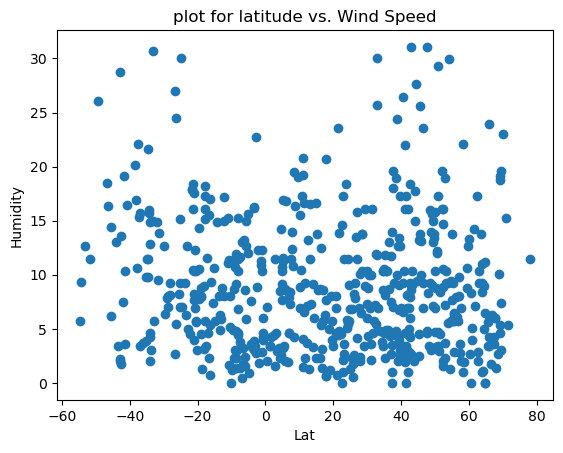

In [51]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y)


# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('plot for latitude vs. Wind Speed')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x,regress_values,"r-")


In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =  city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
City_ID,,,,,,,,,
0,Prince Rupert,CA,54.3161,-130.3201,44.29,71,100,29.93,light rain
1,Rongelap,MH,11.1635,166.8941,81.68,78,100,20.76,light rain
3,Susuman,RU,62.7833,148.1667,1.98,97,100,1.99,overcast clouds
4,Saipan,MP,15.1355,145.7010,81.30,83,40,13.80,scattered clouds
5,Praia da Vitória,PT,38.7333,-27.0667,66.45,82,75,24.43,light rain


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
City_ID,,,,,,,,,
2,Margaret River,AU,-33.9500,115.0667,57.07,57,0,14.90,clear sky
6,Huaraz,PE,-9.5333,-77.5333,67.60,49,47,4.92,light rain
7,Grytviken,GS,-54.2811,-36.5092,35.38,81,9,9.31,clear sky
10,Acaraú,BR,-2.8856,-40.1200,88.70,61,42,22.70,scattered clouds
13,Waitangi,NZ,-43.9535,-176.5597,56.82,87,71,13.00,broken clouds


###  Temperature vs. Latitude Linear Regression Plot

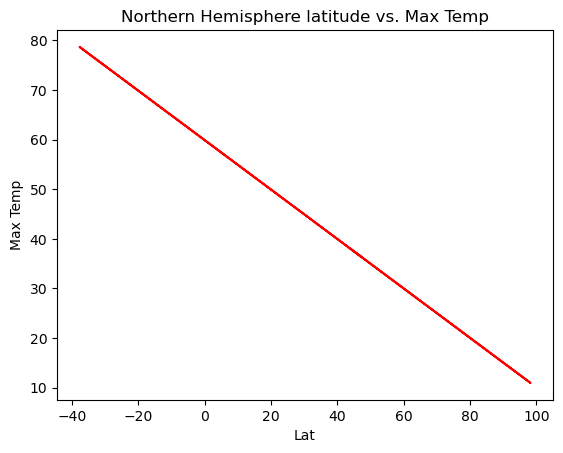

In [66]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df ["Max Temp"]
y = northern_hemi_df ["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Northern Hemisphere latitude vs. Max Temp')
plt.show()

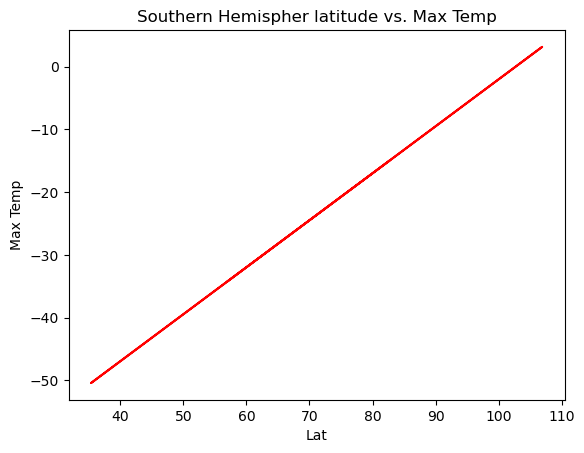

In [59]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ['Max Temp']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Southern Hemispher latitude vs. Max Temp')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

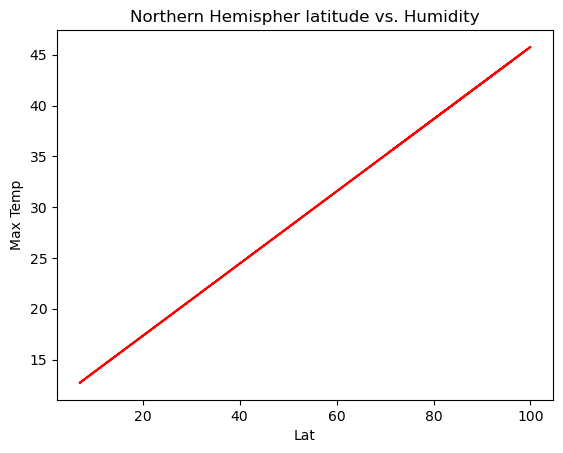

In [60]:
# Northern Hemisphere
x = northern_hemi_df ['Humidity']
y = northern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Northern Hemispher latitude vs. Humidity')
plt.show()



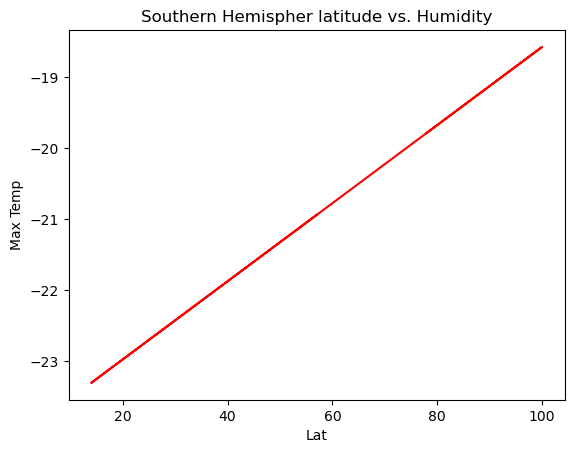

In [61]:
# Southern Hemisphere
x = southern_hemi_df ['Humidity']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Southern Hemispher latitude vs. Humidity')
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

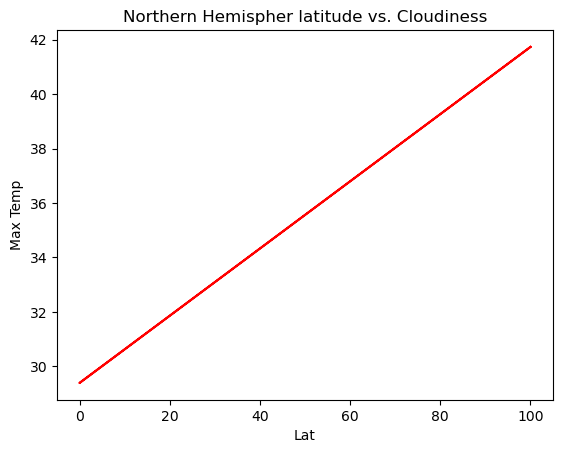

In [62]:
# Northern Hemisphere
x = northern_hemi_df ['Cloudiness']
y = northern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Northern Hemispher latitude vs. Cloudiness')
plt.show()



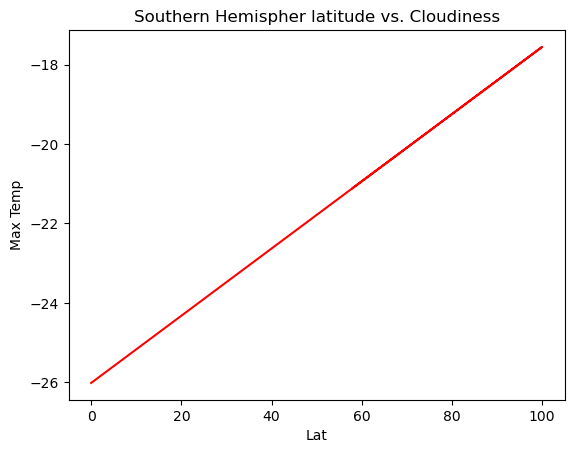

In [63]:
# Southern Hemisphere
x = southern_hemi_df ['Cloudiness']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Southern Hemispher latitude vs. Cloudiness')
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

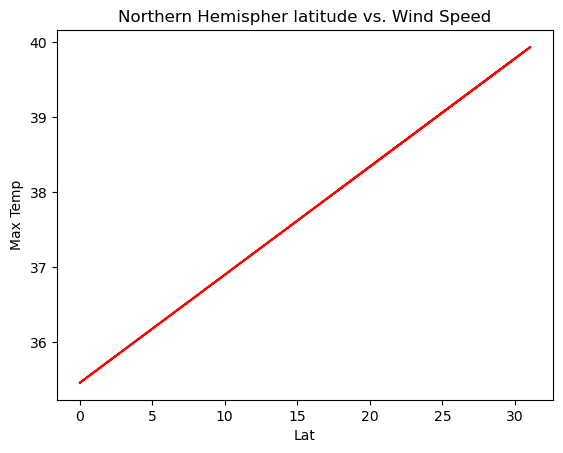

In [65]:
# Northern Hemisphere
x = northern_hemi_df ['Wind Speed']
y = northern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Northern Hemispher latitude vs. Wind Speed')
plt.show()

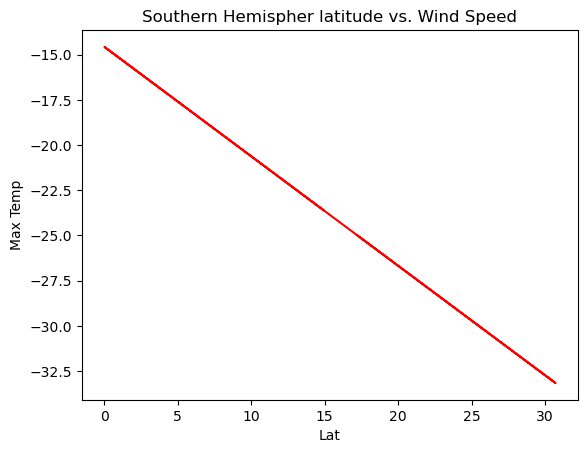

In [64]:
# Southern Hemisphere
x = southern_hemi_df ['Wind Speed']
y = southern_hemi_df ['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('Southern Hemispher latitude vs. Wind Speed')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [68]:
# Invesrly proporational - as one value increase the other decrease ay the same rate
# Directly proportional - both values on the x and y axis increases at the same rate

# Temperature vs. Latitude 
#     Norther Hemisphere - Invesrly proporational
#     Souther Hemisphere - Directly proportional

# Humididty vs. Latitude
#     Norther Hemisphere - Directly proportional
#     Souther Hemisphere - Directly proportional

# Cloudiness vs. Latitude
#     Norther Hemisphere - Directly proportional
#     Souther Hemisphere - Directly proportional


# Wind Speed vs. Latitude
#     Norther Hemisphere - Directly proportional
#     Souther Hemisphere - Invesrly proporational